In [1]:
import pytesseract
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from skimage.exposure import equalize_hist
from skimage.filters import threshold_otsu
from skimage.morphology import opening, closing, square
from skimage.measure import regionprops
from skimage.util import compare_images
from skimage import io

In [11]:
img = cv2.imread('../images/r1-1.png', 0)

In [22]:
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def canny(image):
    return cv2.Canny(image, 10, 200)


def remove_noise(image):
    return cv2.medianBlur(image, 5)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)[1]



In [50]:
def ocr_to_boxes(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    print(pytesseract.image_to_string(img))
    d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.figure(figsize=(220,14))
    plt.imshow(img, cmap='gray')

In [41]:
def apply_ocr(key, img):
    print(f"--Doing ocr for {key}--")
    ocr_text = pytesseract.image_to_string(img)
    print(ocr_text)
    print(f"--Finished ocr for {key}--")

In [44]:
def print_graphs(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    bl = remove_noise(img)
#     th = thresholding(bl)
    op = opening(bl)
    cn = cv2.Canny(op, 10, 200)
#     transf = [img, bl, th, op, cn]
    texts = []
    # for t in transf:
    #     texts.append(pytesseract.image_to_string(t))
    #     texts.append(pytesseract.image_to_string(t, lang='por'))

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Input image')
    ax[1].imshow(op, cmap='gray')
    ax[1].set_title('Opening + blurry')
    ax[2].imshow(cn, cmap='gray')
    ax[2].set_title('Canny')
    plt.show()
    dict(zip())
    for key, img in dict(zip(['img', 'blurry', 'opening', 'canny'], [img, bl, op, cn])).items():
        apply_ocr(key, img)


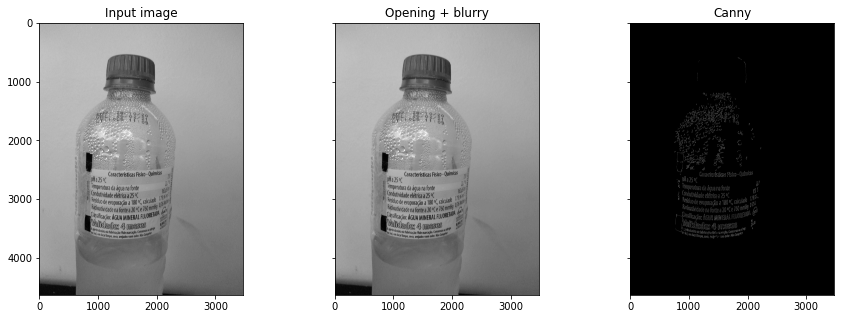

--Doing ocr for img--
 

 

      

 

Caracteﬁsﬁcé; Fisico-

--Finished ocr for img--
--Doing ocr for blurry--
   
  

& i & =

  

A

Ondutividage eléuhdﬂ 4
poragaoa180°(, '
] i.;-f:“

Y Cisicagi: AGUA MINERALFLL
a"dade 4}M

*mu—#
seco, arejado e sem 000

 
   
  

e g S

     
   

--Finished ocr for blurry--
--Doing ocr for opening--
   

= il - S X

o ST Y vy v e WP o B G g

--Finished ocr for opening--
--Doing ocr for canny--
R R iRt
[} TS Evﬂg
g P R R\
9 Q‘ >
g L 5 voq .
56} Lﬁ} DU@ g;&iﬂp;;gzz%ﬁjwq\}
é;&k}amuJ‘;yﬁ%jggﬁj SR
AGIVLLTRE B O -
SN P mT S
T Wi i SINLI e 3
#%&%&mp -V y ﬁ}@\l
Y I “Mf@ = 3
PN @ngﬁw © o
RIS %
P N
| PP LR eI .
S PrT A D E a
33 P j ) &\J Q\)\Qf“ Q}j
E2 v&@@i ?}\—j % /_\
[ =2 —a >
Iz : B
{ m@é%ﬁ%&%hé%ég A Y5 4
E Té?zo ﬂm&m%ﬂgﬂ«f??)%ﬁw Qijfj?@ uJ
A & 2
i %ﬁ B
Ry
. A J )

| GlrE et SR
e TRl ey 4 i

Y@m@»@@ﬁw@ EVTEIE ,
T PRy iR
@fzﬂ@M@ e e @@@U”@dﬁ )
J‘ire\"ﬂ‘“,3 r NN 9 2\
s UL e W”; % ! @

\\.ﬁ%%

AN

A %aﬂ@”gga

B YR
|
\\@ Li@ / Qm \ ;\\“(O‘ | L /E\/Q/CS\/

In [45]:
print_graphs('../images/agua/IMG_20210312_090302189.jpg')


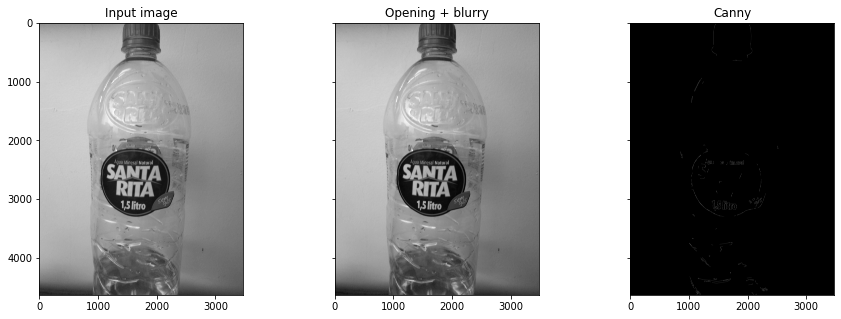

--Doing ocr for img--
 

 

ks

Sm‘um_u ‘ -

 

--Finished ocr for img--
--Doing ocr for blurry--
 

S ' 3

-— - .C‘

CFIUIEL

 

--Finished ocr for blurry--
--Doing ocr for opening--
 

~

- -

‘\ AR -
‘

Natural

1,5 litro

 

--Finished ocr for opening--
--Doing ocr for canny--
//

: =
d P ~
/o ﬁ
/f IO LD I oYl 173
| )

) /L
N §Og§/
\ q}p;\)j@ " /4
DN/ AS NI Y. -
I e
=y \XK - //
\ - — 7
N 3
N
\\\ =
W s
\ IR \// T
3 o]
N @

--Finished ocr for canny--


In [46]:
print_graphs('../images/agua/IMG_20210312_090416867.jpg')

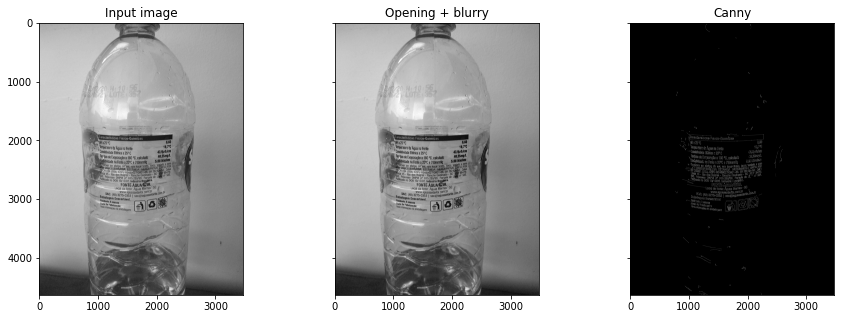

--Doing ocr for img--
 

{

    
  

e

   

aaAmanaFm
‘Wdadeﬂéulcaawc

defvammgioﬂwc sl

    
  
   

u 027/
0. proy : DNPM rgsmgaz"g%
esso n
"‘“cadonooou 10/10/02. Industria
~ FONTEAGUA
Local da fonte; Aguas

o 3.
WWW.aguasantarita.co v A
SAC: (48) 3275-0353 | sac@aguasvﬁ"‘

g o m::‘uewcamm

Dahder‘lhrm- e
\Ma““'w;aonammm =

 
  
  

 
    
  
 

 
     
    
    
     
  

--Finished ocr for img--
--Doing ocr for blurry--
 

 
 

 
  
   

» iractenisticas | 'S.IQ(.?;)-UUHIIIC:
A%°C o
Mnda na Fonte =
m:maeumwc

e Evaporagdo a 180 °C, calc
mFutam"Co H0mmh

 
      
  
   

  
 
     

 

a0 3

AS\%“\LTDA CNPJ 0348508 8
-Rlodoss Rancho bl
Processo DNPM o 815.285/99. Portaria de
Mmooum/m/oz Indastria

FONTE AGU
Local da fonte; Aguas 0"‘35 sc

1 .aguasantarita.com.bf &ﬂ
\ SAC: (48) 32750953 | sac@ao'w
B M Reaca

      
     

 
    
     
      
    

ravel

--Finished ocr for blurry--
--Doing ocr for opening--
 

   

 
 

Condutvidade Elétrica a 25°
Pesn e Evaporagdo a 160 °C, cacua

In [47]:
print_graphs('../images/agua/IMG_20210312_090444614.jpg')

In [ ]:
#1

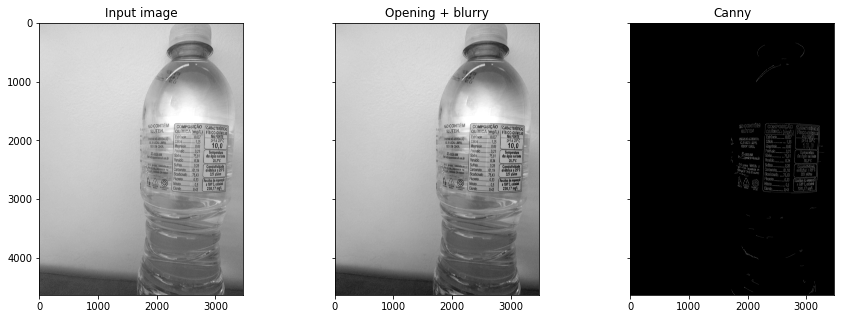

--Doing ocr for img--
 

WOCONTEM  (COMPOSIGAO (CARACTERGTERY
GLUTEN.  |QUIMICA (mg/L) FlSlCO-UlMICAs

Estrineo......... 0,037
CAICIO s, 25

   
     
 

 
      
    
 

: Magnésio......... 0,09
g POtS8I...vc... 0,21
[ S0010....core. 75,81
" Vanédo.....,....mW

Su!fato..................ﬁ,28'

 

e 81,10

--Finished ocr for img--
--Doing ocr for blurry--
 

.u‘ -

MOCONTEM COMPOSICAO (CARACTERGTE:
GLUTEN. QUIMICA (mglL) (FisICo.

: Estrinc.......... 0,037 '
CACIB it 1,25
Magnésio........... 0,09
= Potéssio............. 0,21
'— 30di.............. 15,81
e T[T
' 0S .61,
:3' - | Bicarbonato....

  
  
 

 

 
   
      

 

--Finished ocr for blurry--
--Doing ocr for opening--
MOCONTEM (¢
GUTEN. OMPOSICAO

 

--Finished ocr for opening--
--Doing ocr for canny--
 

 

 

 

 

 
  
    
    

 
  

 

 

   
  

     
 

 

 

 

iip CONTIER ﬁ@@?ﬁ@@@ﬂ?ﬁ@f
BLUTER QUIEMICA (mglL) %ﬂﬁ@&%@%m@

- V= L il O
ﬂ @@aﬁ&@z@@ @E?%%@@@WW@%@% BT i

CEeL g, | YO0 e e A 7
[l e B R (010}
S o — ol CGE

Sl


In [48]:
print_graphs('../images/agua/IMG_20210314_122444455.jpg')

In [ ]:
#2

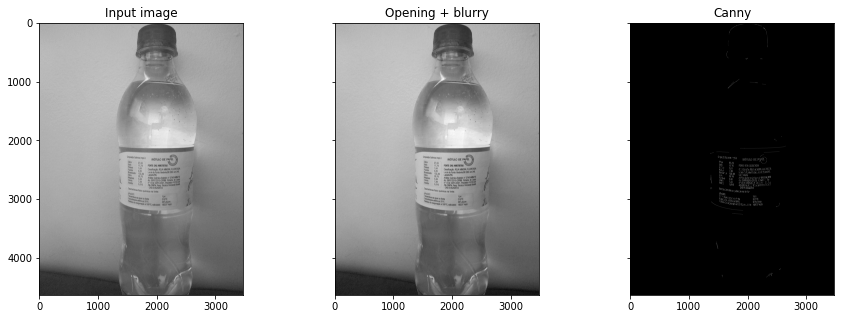

--Doing ocr for img--
 

 
     
   
  

    

LT

ROTULO DE PAPEL

 

Local da Fonte; Rodovia BR 386, km 346,
Lajeado/RS.

--Finished ocr for img--
--Doing ocr for blurry--
 

104 Cassificacio: AGUA MNERAL RLUDRETAOA
mmmmmmbn

--Finished ocr for blurry--
--Doing ocr for opening--
5 g

  
  

f*
E
i

 

--Finished ocr for opening--
--Doing ocr for canny--
 

 

[ LN
/// e
. ~
Bt T
\/\
ey 7,25 NI
%%g T (H T A
e L Y g
XN I ey
@f@@ S T B
I L REY T el g
O Yt oy
we, (M eneeb e 09
DU YT ) e e laaes
- . om0
] YT,

Pz
Gt RO m g

N v gﬂm@@z@
e 2Ly %
W@m’m R

I

e

 

--Finished ocr for canny--


In [49]:
print_graphs('../images/agua/IMG_20210314_122510136.jpg')

 

 
     
   
  

    

LT

ROTULO DE PAPEL

 

Local da Fonte; Rodovia BR 386, km 346,
Lajeado/RS.



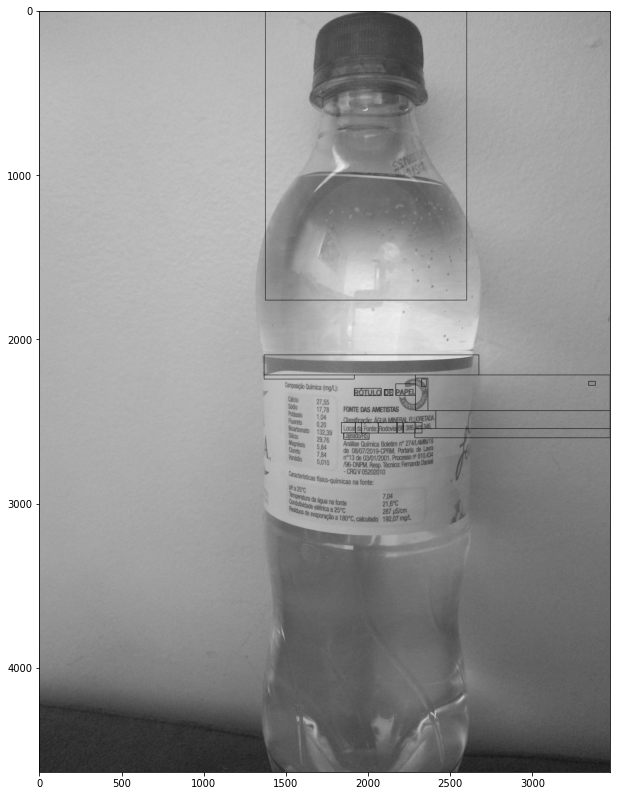

In [51]:
ocr_to_boxes('../images/agua/IMG_20210314_122510136.jpg')

 

WOCONTEM  (COMPOSIGAO (CARACTERGTERY
GLUTEN.  |QUIMICA (mg/L) FlSlCO-UlMICAs

Estrineo......... 0,037
CAICIO s, 25

   
     
 

 
      
    
 

: Magnésio......... 0,09
g POtS8I...vc... 0,21
[ S0010....core. 75,81
" Vanédo.....,....mW

Su!fato..................ﬁ,28'

 

e 81,10



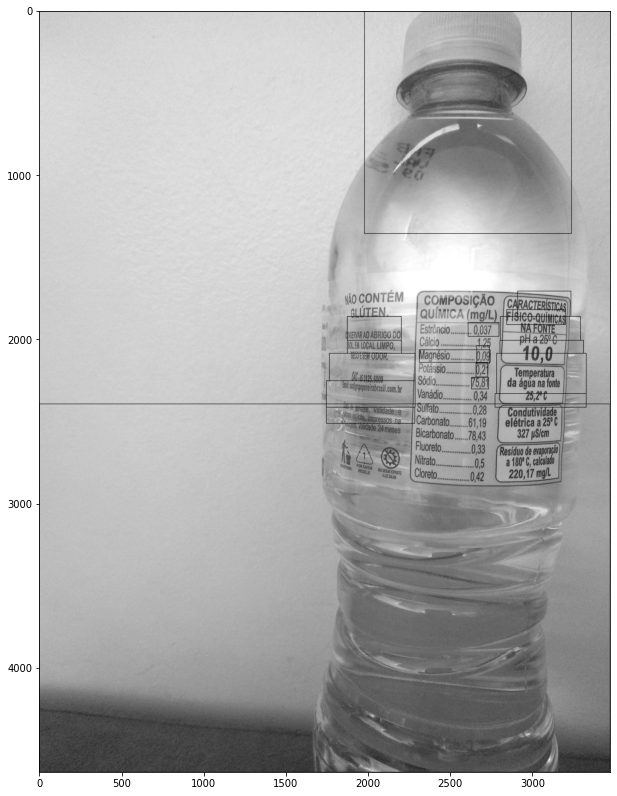

In [52]:
ocr_to_boxes('../images/agua/IMG_20210314_122444455.jpg')

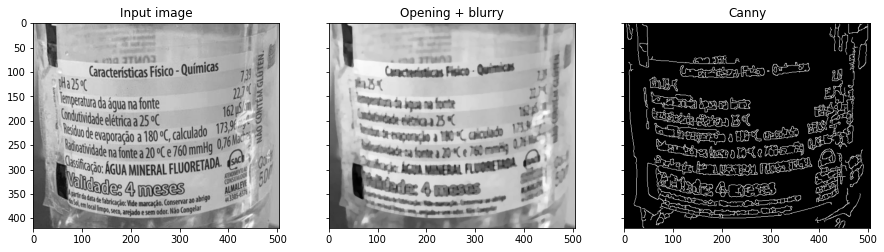

--Doing ocr for img--
) o, | 22

2 ITUND . ‘g
e ((ira(!eﬁsticas Fisico - Quimicas w;

   
 
    
   

nE
emwa\ura daaguana fonte 188"
k| mdutmdade elétriaa25°C X1

o e evaporacio a180°C, cal(ulado 17, Mf'

q'“““dadenameazoo(eMmm O
%m AGUAMINERAL FLUORETADA. € .w
g

24 MESES M

m""“"ﬂw : Vide marcagio, Conservar 20abig0
e o s e s i S

     
 

--Finished ocr for img--
--Doing ocr for blurry--
 
 
      
 

0- Quenks .,y
RS n
TN & g na foote ﬂ; .
WMty « By
A bnmq-lw?;:ﬁﬁ ik ll;"':’
it e 0 60 P o 5l
Aix-mmwf' o

  
 

" ‘NN.—.“"'-‘.

--Finished ocr for blurry--
--Doing ocr for opening--
 

--Finished ocr for opening--
--Doing ocr for canny--
M

s gﬁﬁ G

Q\Gulv/” T > o /\/
T
\L\“‘Q’V\K\«j

%

g

§sl

--Finished ocr for canny--


In [53]:
print_graphs('../images/agua/r1-1.png')

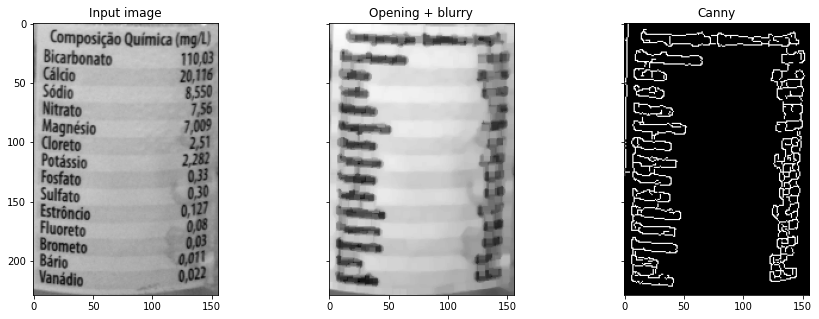

--Doing ocr for img--
FonaRannussy

 

sesiiaalilag

--Finished ocr for img--
--Doing ocr for blurry--
 

--Finished ocr for blurry--
--Doing ocr for opening--
[T

F.EEE&

--Finished ocr for opening--
--Doing ocr for canny--

--Finished ocr for canny--


In [55]:
print_graphs('../images/agua/cut_image_3.png')

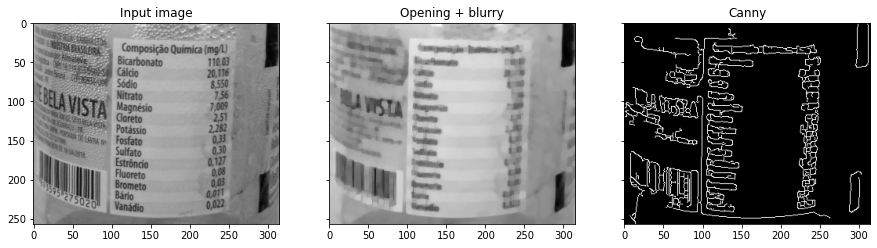

--Doing ocr for img--
 

--Finished ocr for img--
--Doing ocr for blurry--
 

--Finished ocr for blurry--
--Doing ocr for opening--
 

--Finished ocr for opening--
--Doing ocr for canny--
T = ey U

.
g §@

--Finished ocr for canny--


In [56]:
print_graphs('../images/agua/cut_image_2.png')

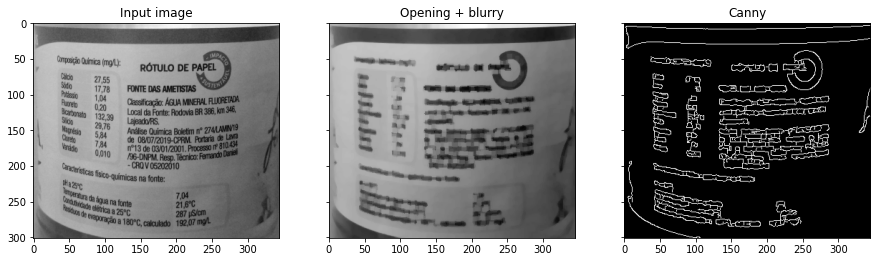

--Doing ocr for img--
:
:
:
;

    
 

Egegapss
5
i
i
2
8

--Finished ocr for img--
--Doing ocr for blurry--
 

--Finished ocr for blurry--
--Doing ocr for opening--
 

--Finished ocr for opening--
--Doing ocr for canny--
1 wﬁ ;
el

LA,/

--Finished ocr for canny--


In [57]:
print_graphs('../images/agua/cut_image_1.png')

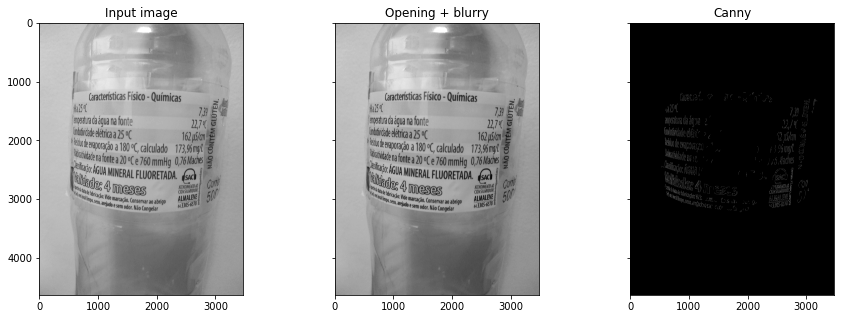

--Doing ocr for img--
 

--Finished ocr for img--
--Doing ocr for blurry--
 

!

LT

     
  
    
    
   

    
 
 

(aractenisticas FlSlCo Quum(as
i 9| a
et da agua na fonte 227'(
Muﬂwdadedéﬁitaalﬂ 16205/
mﬁ £1901(0 3180 °C, alculado 173,90y
| wdadenafumzoo(emm“go

Sfﬁ(aﬁao AGUA . }g
Vhdade MINERAL FLUORETADA. @ ‘ ;

?:lhw 4} ﬂnm oo |

mmm“ AAAEY

 

     
   

--Finished ocr for blurry--
--Doing ocr for opening--
 

!

i' (aracteristicas Fisico - Quimicas

54

aneura 6a aqua na fonte

MW&dedehmZS"(

i ee"aporasaoa180°Ccalculado 1
df fum20°( ]

  
   
   
   

73%

--Finished ocr for opening--
--Doing ocr for canny--
 

FIAE N LV R =
ok kRS
LR e
L . it g
WM@@@@W@@W@ o Y1 e
T o
“\%@%@@zﬂﬁwiy T j;;jwz J g b
/@w m <f S %%%JOAQ joou
T S . Mﬂfg 9
%!L%@g DR@@C oy ;7@\“ ST Méﬂﬁgﬁﬁtﬁgz gg g

o%
Ol @Lﬁﬁ@%{ AU e

--Finished ocr for canny--


In [58]:
print_graphs('../images/agua/IMG_20210315_095318207.jpg')

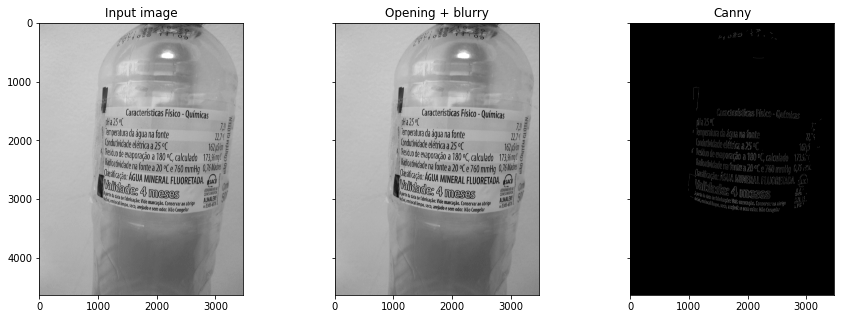

--Doing ocr for img--
 

e
| emperatura da agua na fonte

(nditiade elétricy,
sR duo de evaporagd
y Rdloatlwdad e na font
sy ¢

 
  
    
  
    

 

  

o Tadefy b"‘aﬁﬂ Vide rca;ao Conservar ao abrigo
B local 0, arejado

e sem odor No CMW

--Finished ocr for img--
--Doing ocr for blurry--
 

, (aracteristicas Fisico - Quimicas -
pHa25° . IJi
| lmperatura da dqua na fontce 22.7 (s
(ndutividage elétriaa 25 ¢

4 R de e¥ap0racao a 180 °C, calculado 173,“’ ;
i Raietiigade o fontea 20 °C ¢ 760 mmHg 076
[T AGUA MINERAL FLUORETADL.
‘Va;lid Al

» o fatay efabnca abrigo
em 90 Videlarta;ao Conservarao

  
  
   
  
 

 

  
 

   
  

 

--Finished ocr for blurry--
--Doing ocr for opening--
 

, Caracteristicas Fisico - Quimicas : j,
Y &8 4

Q,Ffmperatura 12 dqua naforyce m% ;

(dutvidade létrca g 25 0

{ Reiun e t1aporacao a 180 °C, calculado 173%m!

bityiona iyt

:{Mm @ ;
'y '

 

  
        

I g AGUA MINERAL FLUORETADA.

--Finished ocr for opening--
--Doing ocr for canny--
o
Y A
&/ﬁ @/dfp

In [59]:
print_graphs('../images/agua/IMG_20210315_095314319.jpg')

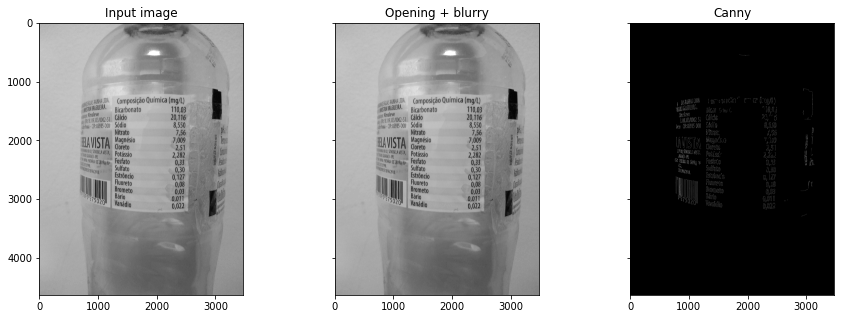

--Doing ocr for img--
S

s

g

     

UL Composicao Quimica (

sl
IAILERA Bicarbonato

ﬁpﬂf Aimaleve
o B 19353/0002-51
i (. 35935-000 Sodno

 

--Finished ocr for img--
--Doing ocr for blurry--
      
    

MWASRAINHA L Composicao Quimica (mg/[)
Bicarbonato

MMwe
w oy Caldo

i - (7:85935-000 Soduo

MWSTA Maqnésuo
- fiogeta

e
m 'y

 
 

--Finished ocr for blurry--
--Doing ocr for opening--
 
    

LU (omposicao Quimica (mg/L)

ﬂmﬂ“ Bicarbonato

,:m&n% 51 Calcio
o (8 85935-000 Sodto

ElAVISTA oy

e
Sulfato.

 

 

 
 

   

nw . 4 5

   
    

    

--Finished ocr for opening--
--Doing ocr for canny--
i By L g
M@@M%@

I
ke
L@ 35035 000

 

 

 

 

 

 

el

B ARk R
@l
Jodic
Hiielie
MAgNCS:0
oiEl
RS Ye
Rsiaie
Sulfate
SN0
Herety
BioTmELe)
Balii
I

T

BN A
[ @@ (gl

RN
RS0
Ly
A
EICY
0,33

Uyd/o

Nl

S IR ST T

\

@C—\%@@@

ey
R

--Finished ocr for canny--


In [60]:
print_graphs('../images/agua/IMG_20210315_095239273.jpg')

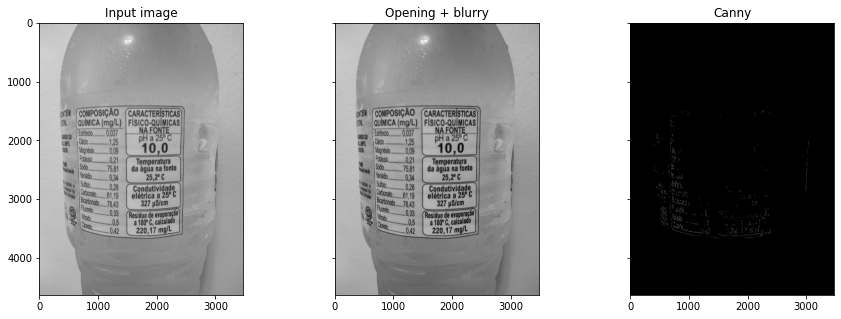

--Doing ocr for img--
 

--Finished ocr for img--
--Doing ocr for blurry--
 

--Finished ocr for blurry--
--Doing ocr for opening--
 

--Finished ocr for opening--
--Doing ocr for canny--
(
(v
.
R
e

(

. {@)

g ) @

P sl
P
—
_
\

(’

>) i
:
S

e
S
% Pl
s
<
m

ol

\ ;\ﬂ Q /\/ b)
N 2

 

ore h é&, ®__) gﬁ ,)J/J( @
LQ/ N PR

(N J

L @@ ﬁ;/ mbjktq 7

\ﬁl\mﬁ%
—

\/\,Qu‘kf\’j e e

Ly v

--Finished ocr for canny--


In [61]:
print_graphs('../images/agua/IMG_20210315_095009513.jpg')

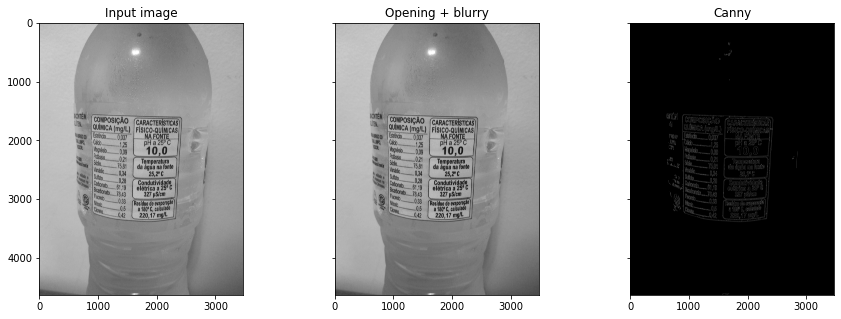

--Doing ocr for img--
    

CARACTERISTICAS
FISICO-QUIMICAS

  
     

 

00...... 0,037

] 05

gagnésto.............o 09

     
      
 
   

  

   

 

Tempera
da aguia na fonte

520

U ——— -,—x-:—u""“"""—‘rx—

Condutividade
elétrica a 25°

e st

Residuo de evapo
a180°C, cale

--Finished ocr for img--
--Doing ocr for blurry--
.
7/
o 'A”7‘ 4

   
       
  
      

RISTICAS
QUIMICAS

 
  

e e S

Condutivi
elétrica a 25

% | 2180°C, caleu
220,171

  

    

--Finished ocr for blurry--
--Doing ocr for opening--
  

 
    

"Condutividade ||
elétricaa25°C ||

 

--Finished ocr for opening--
--Doing ocr for canny--
]

 

 

ey

 

 

R [Ty ((mgi&j
T, 903“7
o[ 35
. m%&@ @.@
CO L, Y
TR -
Vﬁlﬂ@@ .8@@

p %%\%@ﬁi 3%13&@ - @ﬂ ﬂg
H@W@% il

*’;X@J} L@Q{@&@ s O@i

AL

k\

e
WM’\_/—/

 

 

 

CM\(@T@ R
F&%ﬂ@@ OMMB@@@
| pH Yiije

EION0

bf@mp@ratun
( dafaguEInakcnte
- SN dE /j

@@m@@@nw@@e
@U@f@fn@a g 25° /
L2

@@@ TTOIEE il
aR{E0a %U@ﬂﬂﬂ 0
2ol

  
 
   
  

uww

 

 

 

 

 

F)/\\

 

 

o 

In [62]:
print_graphs('../images/agua/IMG_20210315_094941499.jpg')

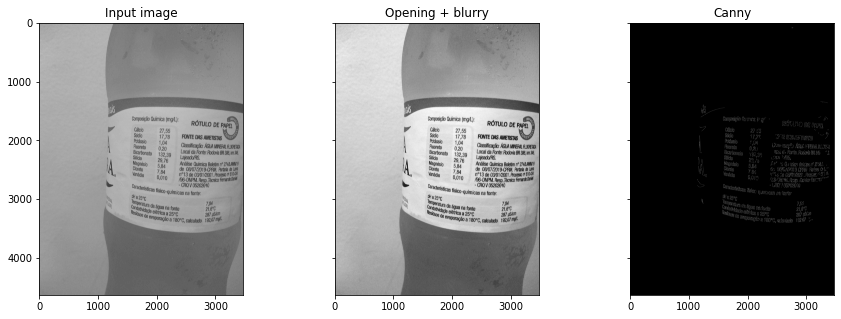

--Doing ocr for img--
 

--Finished ocr for img--
--Doing ocr for blurry--
 

e 10 i A MG AL
ety 2. | Lo el et
| - LaeadoRS
oy, 2378 Andiise Quimica Bolein ° Z74LAMYY
| gggentgsio 284 de 08107/2019-CorM pm” w |
7, . Processo d
Vanéiio 84 13 de 03017201 e

 

--Finished ocr for blurry--
--Doing ocr for opening--
 

17,78 FONTE DAS AMETISTAS

1,04 Ciassificagdo: AGUA MINERAL RLUORETX
Fureto 999 Local da Fonte: Rodovia B3 36, m 36,
Bicarbonat Lajeado/RS,

M Siio 99 76 Andiise Quimica Boletm ° 74LABYS
¢

”
084 4 o&wmm gy
ety 7', maaoamm

 
  

7,04 |3

*Mperatyrg da dgua na fone 21,6°C ¥4
Mg €létrica a 2500 27 "s:_

*Vaporagio a 180°C, calcuiado 19207

   

--Finished ocr for opening--
--Doing ocr for canny--
{yg\g/// - Q\
o | N
—7 3lai N - -
4 e xR wmﬂwm j
Lo e @%&T%WQZMMWW@WQQQQ
L{ Rldieh 0,20 004 0 Fomle, Rodovia BR 2% °3
E%ﬁmw%@ [RENE B R
S oNE LTy ——. .
4G AN N el e
| i 1T R IO e LI
&%A @EOJF @i@ ? @(ﬂ/ (0 OYL} é) U@ U&/ﬂﬁﬂ Jj VM?&}@?
. I e et
S 2 b:é }ﬁ (0 05/@205 U
@@m@@@ﬁ%@ﬁ@a@ 

In [63]:
print_graphs('../images/agua/IMG_20210315_094909613.jpg')